## Configuration

In [24]:
# Data management
import pandas as pd


# Graphics
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
import seaborn as sns
sns.set(font_scale=1.49)
sns.set_style("whitegrid")
sns.set_style({'font.family':'monospace'})

## Use case 1. Mesh times

In [25]:
times = pd.read_csv('mesh_times.txt', sep=";", header=None)
times.columns = ["number_nodes","start","end","mesh_time"]

In [26]:
def is_outlier(s):
    Q1 =s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    return ~s.between(lower_limit, upper_limit)

times = times[~times.groupby('number_nodes')['mesh_time'].apply(is_outlier)]

In [27]:
times.groupby('number_nodes').describe()

mesh_time                                                    \
                 count      mean       std       min       25%       50%   
number_nodes                                                               
2                 26.0  0.820170  0.037796  0.745837  0.795979  0.839441   
3                 30.0  0.876904  0.023639  0.845965  0.855686  0.867276   
4                 23.0  0.910666  0.006426  0.899947  0.905735  0.911273   
5                 22.0  0.920470  0.006875  0.905398  0.915277  0.921301   
6                 27.0  0.928658  0.012456  0.912861  0.919454  0.925288   
7                 30.0  0.968852  0.022035  0.930486  0.944022  0.978101   
8                 24.0  0.988478  0.010345  0.968889  0.984227  0.988450   
9                 22.0  1.004301  0.005246  0.995041  1.001142  1.003146   
10                27.0  1.014281  0.010870  0.997486  1.007000  1.010862   
11                29.0  1.035444  0.019879  0.987106  1.023407  1.031524   
12                25.0  1.050202  0.017171  1.027777  1.038136  1.044965   
13                30.0  1.084074  0.021261  1.048291  1.068726  1.088887   
14                28.0  1.105862  0.021841  1.059066  1.093300  1.105846   
15                29.0  1.150950  0.027520  1.102936  1.127710  1.147661   
16                23.0  1.193384  0.017515  1.155616  1.180999  1.191615   
17                26.0  1.211440  0.023954  1.171919  1.198621  1.210424   
18                28.0  1.239382  0.027595  1.196939  1.216913  1.234301   
19                27.0  1.290821  0.027527  1.239201  1.275977  1.288635   
20                27.0  1.320191  0.026191  1.278755  1.296282  1.324570   
21                30.0  1.375832  0.029385  1.319511  1.353068  1.373807   
22                27.0  1.408273  0.026800  1.346266  1.389727  1.409510   
23                26.0  1.478061  0.029225  1.411256  1.460751  1.477831   
24                25.0  1.518704  0.029859  1.460693  1.504154  1.524406   
25                29.0  1.633354  0.037662  1.566873  1.605375  1.634208   

                                  
                   75%       max  
number_nodes                      
2             0.845524  0.910479  
3             0.900063  0.912693  
4             0.916331  0.920481  
5             0.925668  0.933437  
6             0.935530  0.958901  
7             0.985243  0.994890  
8             0.993291  1.008458  
9             1.006872  1.015276  
10            1.021581  1.038397  
11            1.049379  1.074609  
12            1.062511  1.098483  
13            1.097309  1.138652  
14            1.120584  1.155805  
15            1.175564  1.193494  
16            1.202017  1.232421  
17            1.223513  1.266619  
18            1.262356  1.289767  
19            1.302736  1.354777  
20            1.345753  1.359937  
21            1.399968  1.430365  
22            1.424621  1.459688  
23            1.494434  1.522352  
24            1.530399  1.595965  
25            1.652584  1.703999

<AxesSubplot:xlabel='number_nodes', ylabel='mesh_time'>

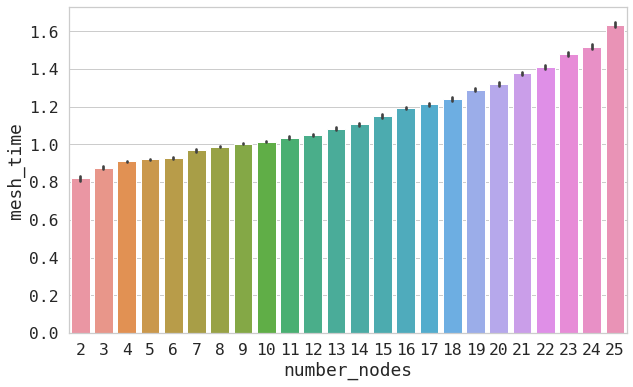

In [28]:
# barplot
fig, axs = plt.subplots(1, 1, figsize=(10,6))
sns.barplot(x='number_nodes',
            y='mesh_time',
            data=times,
            ax=axs)

<AxesSubplot:xlabel='number_nodes', ylabel='mesh_time'>

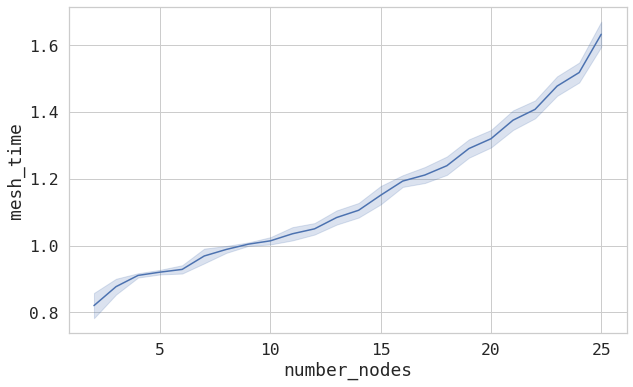

In [29]:
# mean lineplot with std
fig, axs = plt.subplots(1, 1, figsize=(10,6))
sns.lineplot(x='number_nodes',
             y='mesh_time',
             data=times,
             err_style="band",
             ci='sd',
             ax=axs)

<AxesSubplot:xlabel='number_nodes', ylabel='mesh_time'>

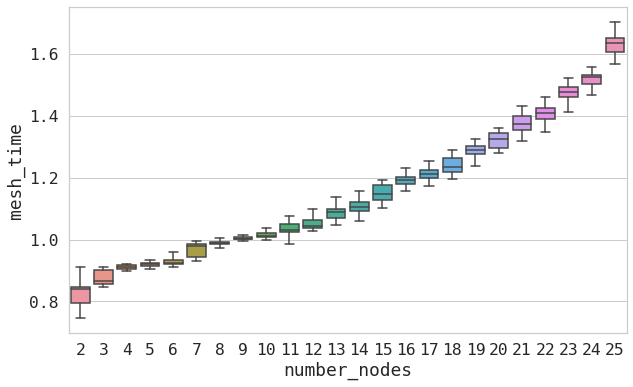

In [30]:
# boxplot
fig, axs = plt.subplots(1, 1, figsize=(10,6))
sns.boxplot(x='number_nodes',
            y='mesh_time',
            data=times,
            showfliers=False)

<AxesSubplot:xlabel='number_nodes', ylabel='mesh_time'>

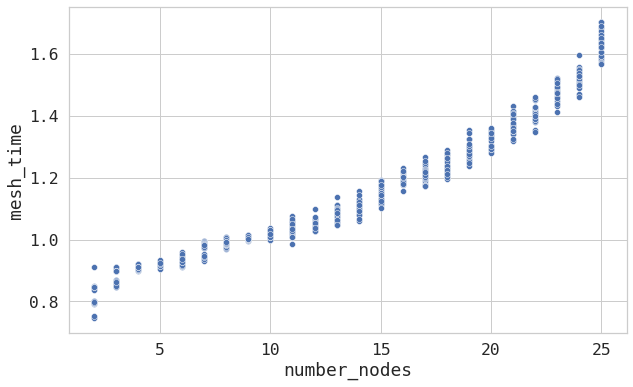

In [31]:
# points of each experiment
fig, axs = plt.subplots(1, 1, figsize=(10,6))
sns.scatterplot(x='number_nodes',
            y='mesh_time',
            data=times)

<AxesSubplot:xlabel='number_nodes', ylabel='mesh_time'>

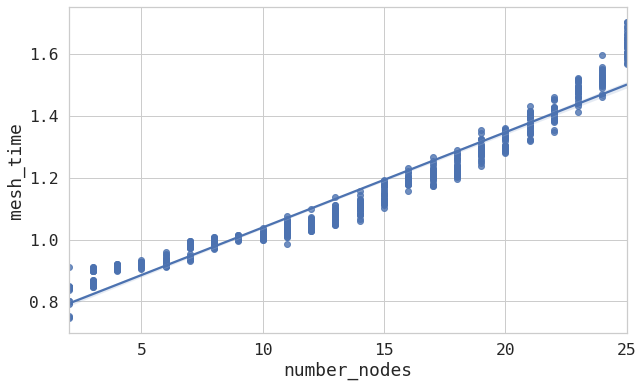

In [32]:
# linear regression
fig, axs = plt.subplots(1, 1, figsize=(10,6))
sns.regplot(x='number_nodes',
            y='mesh_time',
            data=times,
            ax=axs)

<AxesSubplot:xlabel='number_nodes', ylabel='mesh_time'>

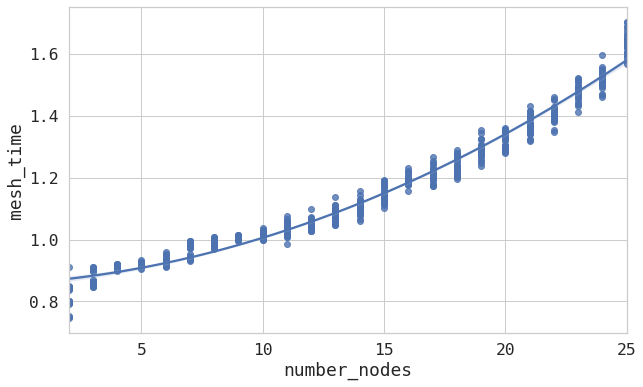

In [33]:
# polynomial regression of order 2
fig, axs = plt.subplots(1, 1, figsize=(10,6))
sns.regplot(x='number_nodes',
            y='mesh_time',
            data=times,
            order=2,
            ax=axs)

## Use case 2. Resizing times

### with exponentially-generated values

In [70]:
times = pd.read_csv('resizing_times.txt', sep=";", header=None)
times.columns = ["arrival_time","ith_node","start","end","service_time"]
#times = times.replace({-1:'continuous'})

In [71]:
times.head()

,arrival_time,ith_node,start,end,service_time
0,0.25,1,00:24:49.029426,00:24:49.887133,0.857707
1,0.25,2,00:24:49.718126,00:24:50.679100,0.960974
2,0.25,3,00:24:51.495845,00:24:52.523112,1.027267
3,0.25,4,00:24:52.133311,00:24:53.195105,1.061794
4,0.25,5,00:24:48.187097,00:24:49.079106,0.892009


In [72]:
times.arrival_time.unique()

array([ 0.25,  0.5 ,  1.  ,  2.  ,  3.  ,  5.  , 10.  , -1.  ])

In [73]:
def is_outlier(s):
    Q1 =s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    return ~s.between(lower_limit, upper_limit)

times = times[~times.groupby(['arrival_time','ith_node'])['service_time'].apply(is_outlier)]

In [74]:
times.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5826 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   arrival_time  5826 non-null   float64
 1   ith_node      5826 non-null   int64  
 2   start         5826 non-null   object 
 3   end           5826 non-null   object 
 4   service_time  5826 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 273.1+ KB


In [94]:
x='ith_node'
y='service_time'
hue='arrival_time'

<AxesSubplot:xlabel='ith_node', ylabel='service_time'>

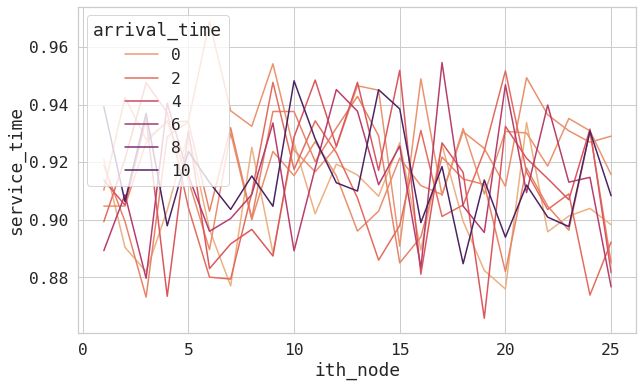

In [78]:
# barplot
fig, axs = plt.subplots(1, 1, figsize=(10,6))
sns.lineplot(data=times,
             x=x,
             y=y,
             hue=hue,
             palette="flare",
             ci=None,
             ax=axs)

<AxesSubplot:xlabel='ith_node', ylabel='service_time'>

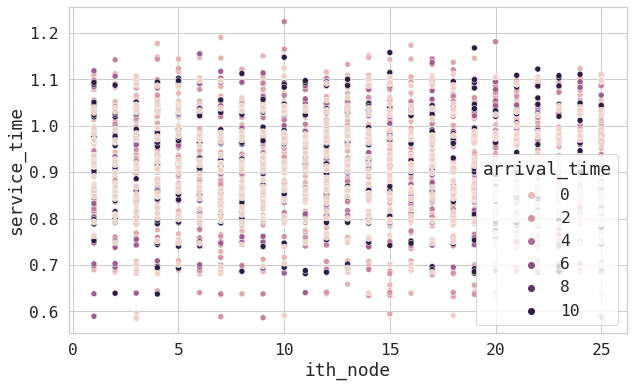

In [79]:
fig, axs = plt.subplots(1, 1, figsize=(10,6))
sns.scatterplot(data=times,
             x=x,
             y=y,
             hue=hue,
             ax=axs)

<Figure size 864x576 with 0 Axes>

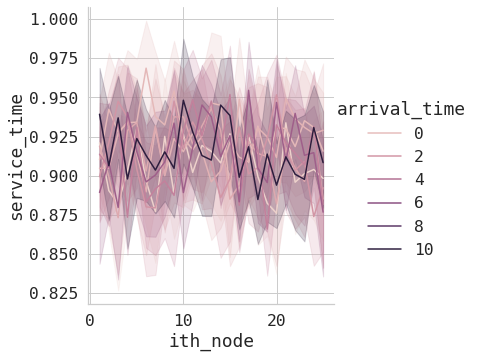

In [86]:
fig = plt.figure(figsize=(12,8))
sns.relplot(data=times,
             x=x,
             y=y,
             hue=hue,
             kind='line')

<AxesSubplot:xlabel='ith_node', ylabel='service_time'>

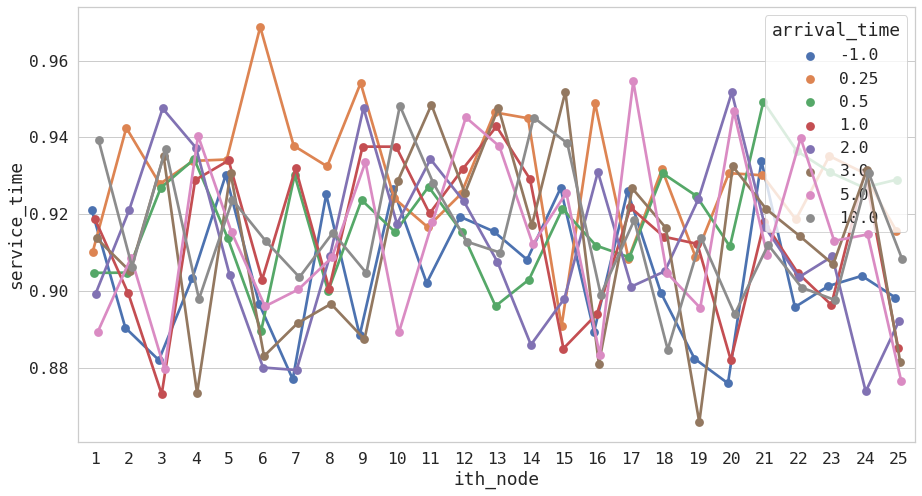

In [105]:
fig, axs = plt.subplots(1, 1, figsize=(15,8))

sns.pointplot(x=x,
            y=y,
            hue=hue,
            data=times,
            ax=axs,
            legend_out=True,
            dodge=True,
             ci=None)

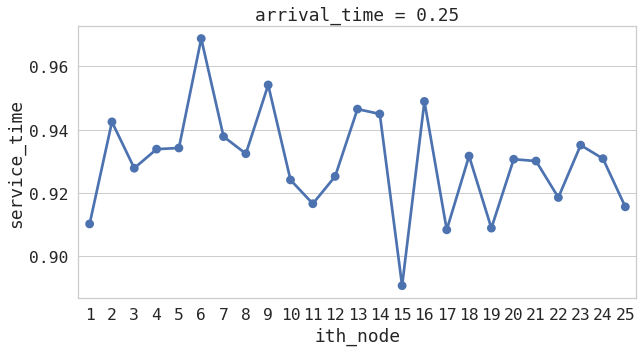

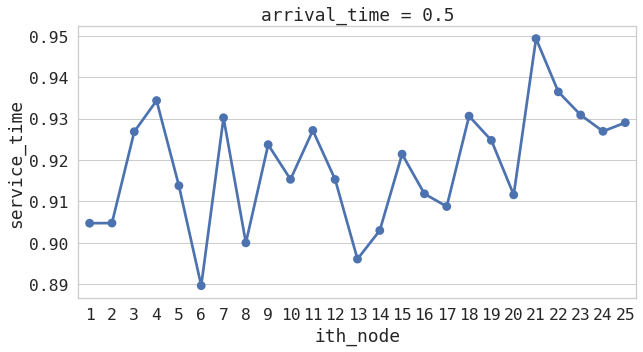

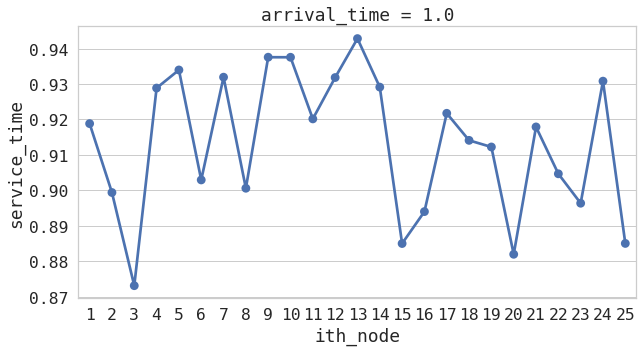

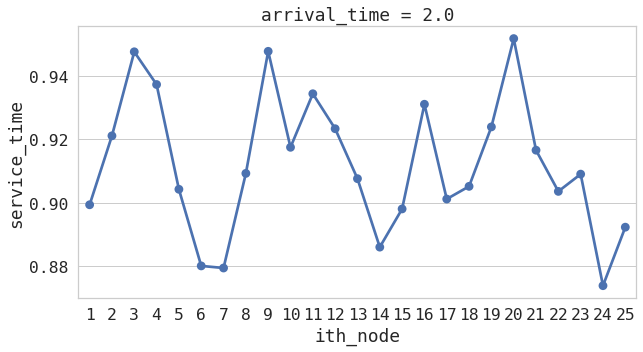

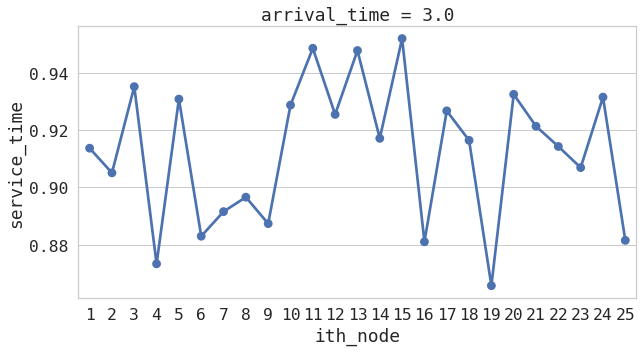

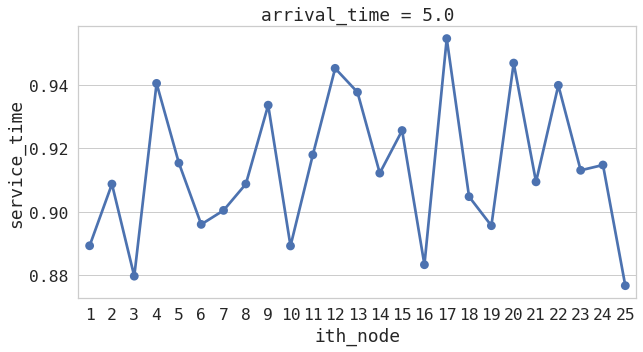

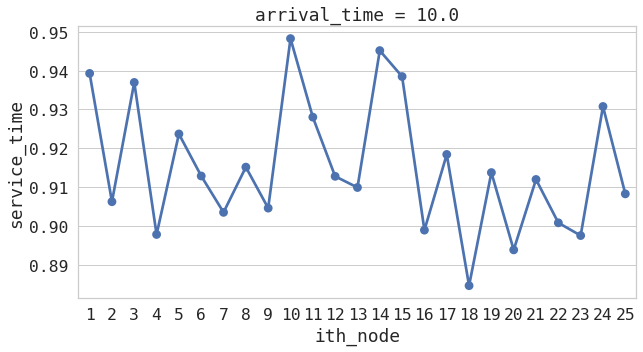

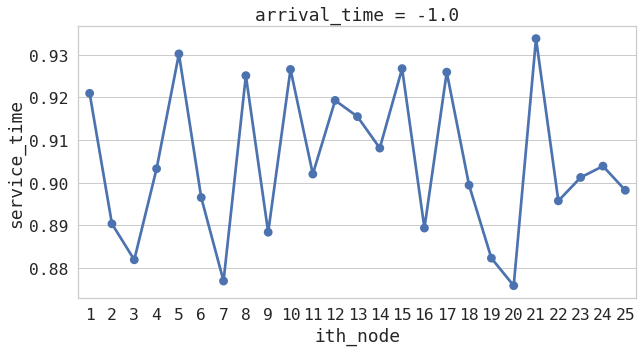

In [114]:
for arrival_time in times.arrival_time.unique():
    fig, axs = plt.subplots(1, 1, figsize=(10,5))
    sns.pointplot(x=x,
                y=y,
                data=times[times.arrival_time==arrival_time],
                ax=axs,
                legend_out=True,
                dodge=True,
                ci=None)
    plt.title("arrival_time = " + str(arrival_time))
    plt.show()

Text(0.5, 1.0, 'without considering time arrival')

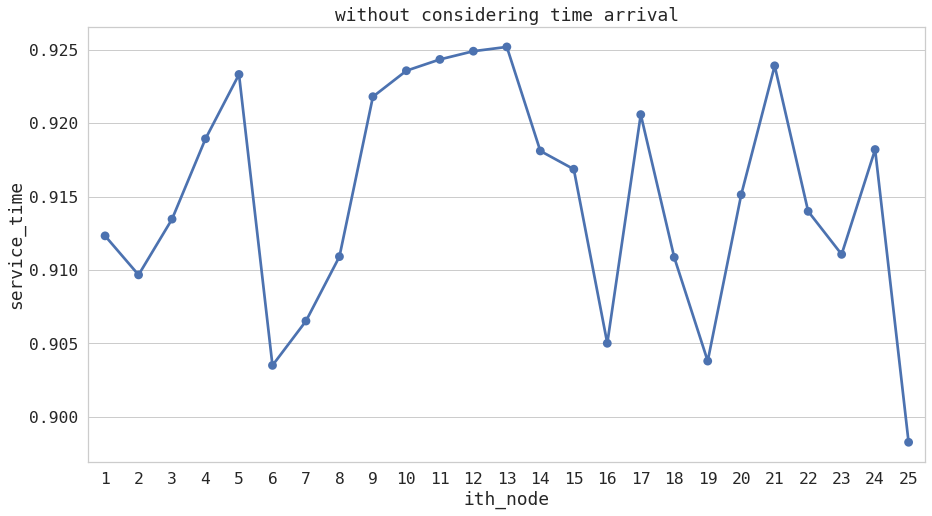

In [115]:
fig, axs = plt.subplots(1, 1, figsize=(15,8))

sns.pointplot(x=x,
            y=y,
            data=times,
            ax=axs,
            legend_out=True,
            dodge=True,
            ci=None)

plt.title("without considering time arrival")


### with constant values

In [116]:
times = pd.read_csv('resizing_times_constant.txt', sep=";", header=None)
times.columns = ["arrival_time","ith_node","start","end","service_time"]
#times = times.replace({-1:'continuous'})

In [117]:
times.head()

,arrival_time,ith_node,start,end,service_time
0,0.05,1,12:00:50.882039,12:00:52.051551,1.169512
1,0.05,2,12:00:49.633097,12:00:50.635209,1.002112
2,0.05,3,12:00:46.782490,12:00:47.655133,0.872643
3,0.05,4,12:00:50.682430,12:00:51.839273,1.156843
4,0.05,5,12:00:47.589500,12:00:48.507143,0.917643


In [118]:
times.arrival_time.unique()

array([0.05, 0.1 , 0.25, 0.5 , 1.  , 2.  , 5.  ])

In [119]:
def is_outlier(s):
    Q1 =s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    return ~s.between(lower_limit, upper_limit)

times = times[~times.groupby(['arrival_time','ith_node'])['service_time'].apply(is_outlier)]

In [128]:
times.groupby(['arrival_time','ith_node']).describe()

service_time                                          \
                             count      mean       std       min       25%   
arrival_time ith_node                                                        
0.05         1                10.0  0.970688  0.118262  0.848004  0.879306   
             2                10.0  0.940724  0.093330  0.816828  0.888717   
             3                10.0  0.962607  0.121577  0.782590  0.885700   
             4                 9.0  0.995249  0.096173  0.830365  0.959737   
             5                10.0  1.001559  0.100331  0.868501  0.914839   
...                            ...       ...       ...       ...       ...   
5.00         21               10.0  0.909349  0.080376  0.747999  0.862413   
             22               10.0  0.900412  0.121039  0.678678  0.846324   
             23               10.0  0.880746  0.057537  0.787138  0.840826   
             24               10.0  0.907614  0.066712  0.808530  0.859058   
             25               10.0  0.921080  0.090989  0.746459  0.874219   

                                                     
                            50%       75%       max  
arrival_time ith_node                                
0.05         1         0.928183  1.035221  1.169512  
             2         0.906814  0.998437  1.116717  
             3         0.979236  1.037747  1.152323  
             4         0.977726  1.062802  1.156843  
             5         1.007205  1.092013  1.108088  
...                         ...       ...       ...  
5.00         21        0.915042  0.971524  1.015498  
             22        0.899043  0.969936  1.080584  
             23        0.877759  0.922243  0.972665  
             24        0.905595  0.950682  1.024797  
             25        0.904185  1.005823  1.034081  

[175 rows x 8 columns]

In [121]:
x='ith_node'
y='service_time'
hue='arrival_time'

<AxesSubplot:xlabel='ith_node', ylabel='service_time'>

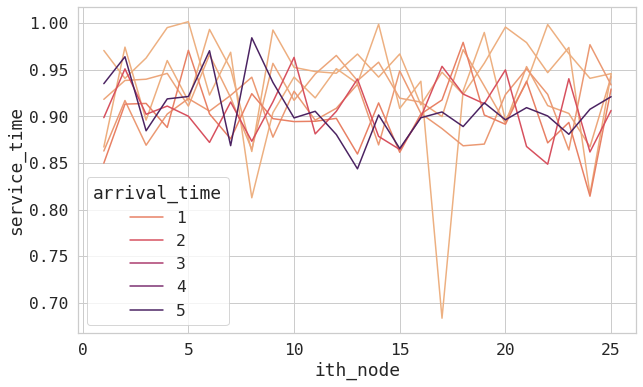

In [122]:
# barplot
fig, axs = plt.subplots(1, 1, figsize=(10,6))
sns.lineplot(data=times,
             x=x,
             y=y,
             hue=hue,
             palette="flare",
             ci=None,
             ax=axs)

<AxesSubplot:xlabel='ith_node', ylabel='service_time'>

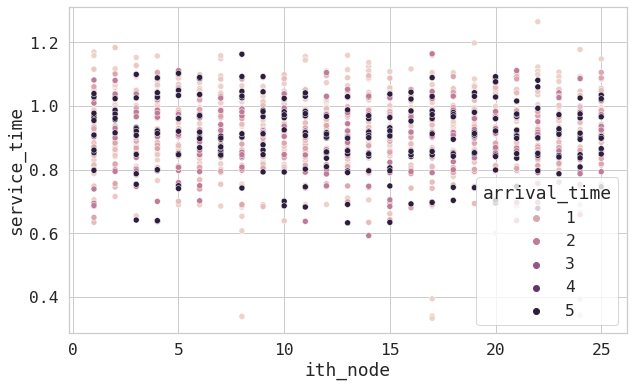

In [123]:
fig, axs = plt.subplots(1, 1, figsize=(10,6))
sns.scatterplot(data=times,
             x=x,
             y=y,
             hue=hue,
             ax=axs)

<Figure size 864x576 with 0 Axes>

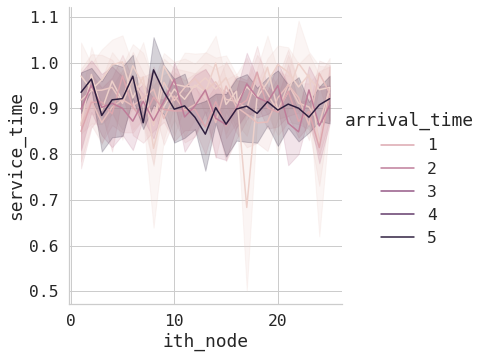

In [124]:
fig = plt.figure(figsize=(12,8))
sns.relplot(data=times,
             x=x,
             y=y,
             hue=hue,
             kind='line')

<AxesSubplot:xlabel='ith_node', ylabel='service_time'>

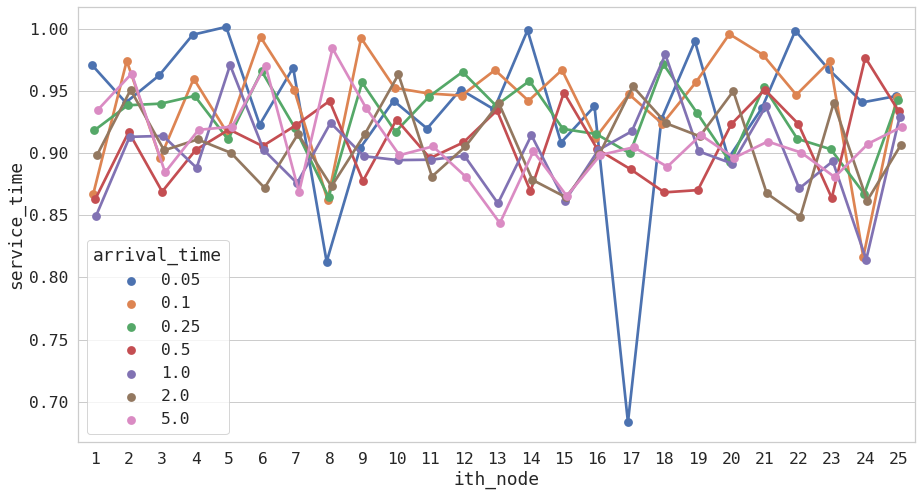

In [125]:
fig, axs = plt.subplots(1, 1, figsize=(15,8))

sns.pointplot(x=x,
            y=y,
            hue=hue,
            data=times,
            ax=axs,
            legend_out=True,
            dodge=True,
             ci=None)

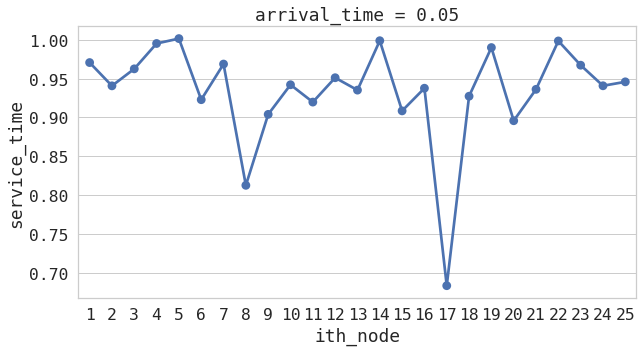

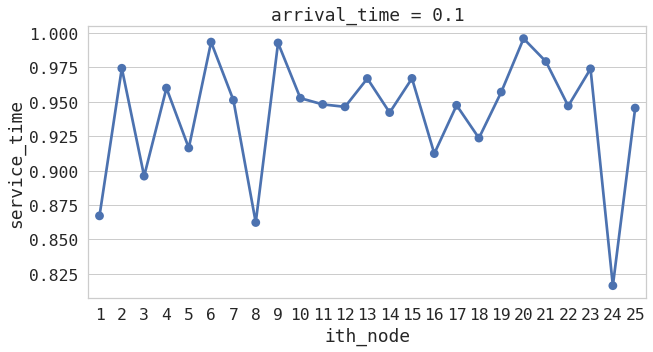

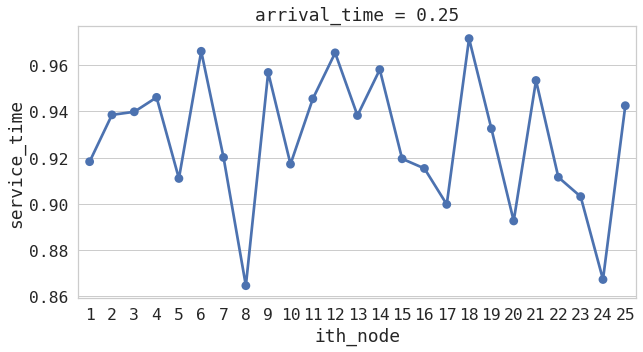

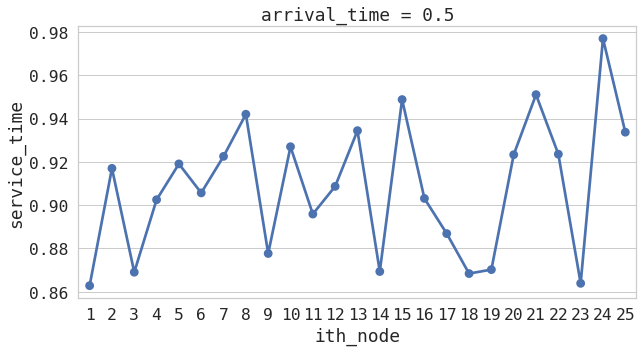

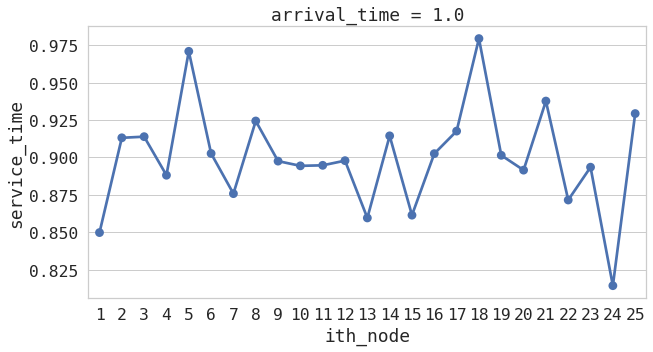

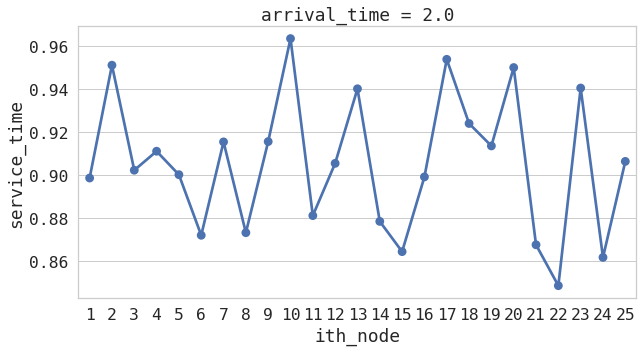

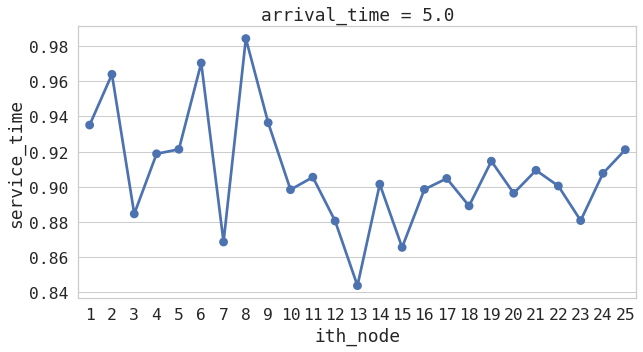

In [126]:
for arrival_time in times.arrival_time.unique():
    fig, axs = plt.subplots(1, 1, figsize=(10,5))
    sns.pointplot(x=x,
                y=y,
                data=times[times.arrival_time==arrival_time],
                ax=axs,
                legend_out=True,
                dodge=True,
                ci=None)
    plt.title("arrival_time = " + str(arrival_time))
    plt.show()

Text(0.5, 1.0, 'without considering time arrival')

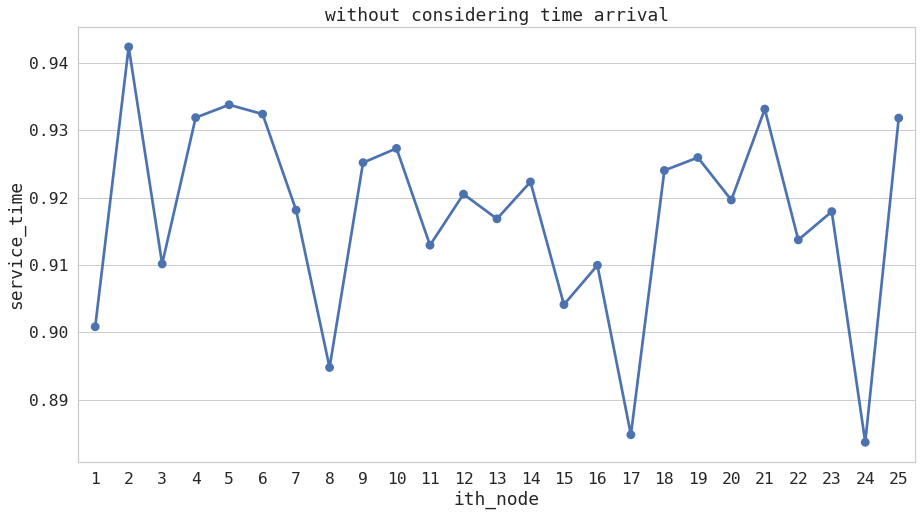

In [127]:
fig, axs = plt.subplots(1, 1, figsize=(15,8))

sns.pointplot(x=x,
            y=y,
            data=times,
            ax=axs,
            legend_out=True,
            dodge=True,
            ci=None)

plt.title("without considering time arrival")
